In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('banking.csv')

# Застосування one-hot до категорійних характеристик
df = pd.get_dummies(df)

# Підготовка даних
X = df.drop('y', axis=1)
y = df['y']

In [3]:
# Завдання 1: Розбиття даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Завдання 2: Створення та тренування моделі й прогноози
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Матриця помилок отрыманих значення TN, FP, FN, TP):  [[10597   334]
 [  828   598]]
Точність, що клієнт відкриє вклад:  0.6416309012875536
Повнота:  0.41935483870967744
F1-оцінка, середнє гармонічне точності та повноти:  0.5072094995759118


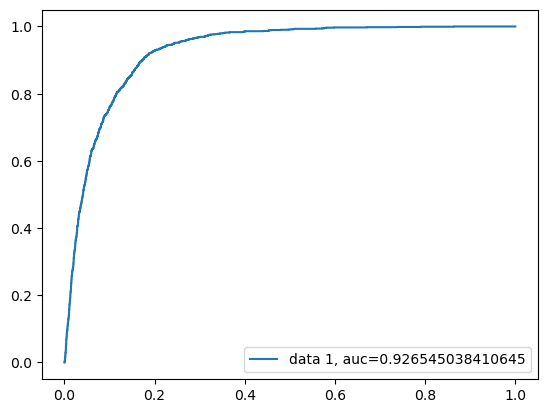

In [5]:
# Завдання 3: Оцінка моделі
print("Матриця помилок отрыманих значення TN, FP, FN, TP): ", confusion_matrix(y_test, y_pred))
print("Точність, що клієнт відкриє вклад: ", precision_score(y_test, y_pred))
print("Повнота: ", recall_score(y_test, y_pred))
print("F1-оцінка, середнє гармонічне точності та повноти: ", f1_score(y_test, y_pred))

# Побудова AUC-ROC кривої
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Import additional libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameters for exploration
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Implement GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit data to Grid Search
grid_search.fit(X_train, y_train)

# Get the optimal model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

# Plot the AUC-ROC curve
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
